# eda001
baseline_locationsの単純な可視化

In [11]:
import os
import pandas as pd
import ipynb_path
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
%matplotlib inline

In [12]:
def get_nb_name():
    nb_path = ipynb_path.get()
    nb_name = nb_path.rsplit('/',1)[1].replace('.ipynb','')
    return nb_name

In [13]:
# directory setting
nb_name = get_nb_name()
INPUT = '../input/google-smartphone-decimeter-challenge'
OUTPUT = '../output/' + nb_name
os.makedirs(OUTPUT, exist_ok=True)

In [14]:
# reading data
base_train = pd.read_csv(INPUT + '/' + 'baseline_locations_train.csv')
base_test = pd.read_csv(INPUT + '/' + 'baseline_locations_test.csv')
sample_sub = pd.read_csv(INPUT + '/' + 'sample_submission.csv')
ground_truth_train = pd.read_csv(INPUT + '/prep/ground_truth_train.csv')

In [16]:
base_train.head()

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,phone
0,2020-05-14-US-MTV-1,Pixel4,1273529463442,37.423575,-122.094091,-34.06,2020-05-14-US-MTV-1_Pixel4
1,2020-05-14-US-MTV-1,Pixel4,1273529464442,37.423578,-122.094101,-33.29,2020-05-14-US-MTV-1_Pixel4
2,2020-05-14-US-MTV-1,Pixel4,1273529465442,37.423573,-122.094111,-30.99,2020-05-14-US-MTV-1_Pixel4
3,2020-05-14-US-MTV-1,Pixel4,1273529466442,37.423583,-122.094121,-32.83,2020-05-14-US-MTV-1_Pixel4
4,2020-05-14-US-MTV-1,Pixel4,1273529467442,37.423579,-122.094114,-34.49,2020-05-14-US-MTV-1_Pixel4


In [17]:
base_test.head()

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,phone
0,2020-05-15-US-MTV-1,Pixel4,1273608785432,37.416628,-122.082053,-30.69,2020-05-15-US-MTV-1_Pixel4
1,2020-05-15-US-MTV-1,Pixel4,1273608786432,37.416646,-122.082040,-31.76,2020-05-15-US-MTV-1_Pixel4
2,2020-05-15-US-MTV-1,Pixel4,1273608787432,37.416653,-122.082039,-31.65,2020-05-15-US-MTV-1_Pixel4
3,2020-05-15-US-MTV-1,Pixel4,1273608788432,37.416607,-122.082063,-31.52,2020-05-15-US-MTV-1_Pixel4
4,2020-05-15-US-MTV-1,Pixel4,1273608789432,37.416609,-122.082073,-28.95,2020-05-15-US-MTV-1_Pixel4


### collectionNameの数

In [21]:
print('train : ', base_train['collectionName'].nunique())
print('test : ', base_test['collectionName'].nunique())

train :  29
test :  19


### collectionNameのtrain, testでの重複

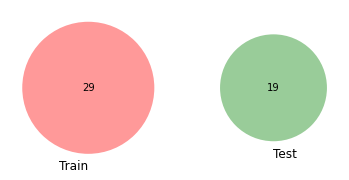

In [24]:
venn2(subsets=(set(base_train['collectionName'].unique()), set(base_test['collectionName'].unique())), set_labels=('Train', 'Test'))

### collectionNameごとのphoneの数

In [40]:
base_train.drop_duplicates(['collectionName', 'phoneName']).groupby(['collectionName'])['phone'].count().value_counts()

2    12
3    10
4     4
1     3
Name: phone, dtype: int64

In [41]:
base_test.drop_duplicates(['collectionName', 'phoneName']).groupby(['collectionName'])['phone'].count().value_counts()

2    8
3    7
1    2
5    1
4    1
Name: phone, dtype: int64

### collection日付

In [73]:
tmp = base_train.drop_duplicates(['collectionName']).copy()
tmp['collectionDate'] = pd.to_datetime(tmp['collectionName'].str[:10])
print('trainの日付範囲')
print(tmp['collectionDate'].min().date(), ' - ', tmp['collectionDate'].max().date())

trainの日付範囲
2020-05-14  -  2021-04-29


In [74]:
tmp['collectionDate'].unique()

array(['2020-05-14T00:00:00.000000000', '2020-05-21T00:00:00.000000000',
       '2020-05-29T00:00:00.000000000', '2020-06-04T00:00:00.000000000',
       '2020-06-05T00:00:00.000000000', '2020-06-11T00:00:00.000000000',
       '2020-07-08T00:00:00.000000000', '2020-07-17T00:00:00.000000000',
       '2020-08-03T00:00:00.000000000', '2020-08-06T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-03-10T00:00:00.000000000',
       '2021-04-15T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-04-26T00:00:00.000000000', '2021-04-28T00:00:00.000000000',
       '2021-04-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [71]:
tmp = base_test.drop_duplicates(['collectionName']).copy()
tmp['collectionDate'] = pd.to_datetime(tmp['collectionName'].str[:10])
print('testの日付範囲')
print(tmp['collectionDate'].min().date(), ' - ', tmp['collectionDate'].max().date())

testの日付範囲
2020-05-15  -  2021-04-29


In [75]:
tmp['collectionDate'].unique()

array(['2020-05-14T00:00:00.000000000', '2020-05-21T00:00:00.000000000',
       '2020-05-29T00:00:00.000000000', '2020-06-04T00:00:00.000000000',
       '2020-06-05T00:00:00.000000000', '2020-06-11T00:00:00.000000000',
       '2020-07-08T00:00:00.000000000', '2020-07-17T00:00:00.000000000',
       '2020-08-03T00:00:00.000000000', '2020-08-06T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-03-10T00:00:00.000000000',
       '2021-04-15T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-04-26T00:00:00.000000000', '2021-04-28T00:00:00.000000000',
       '2021-04-29T00:00:00.000000000'], dtype='datetime64[ns]')

### phoneNameの数

<AxesSubplot:>

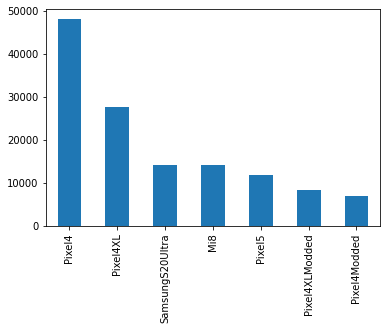

In [33]:
base_train['phoneName'].value_counts().plot(kind='bar')

<AxesSubplot:>

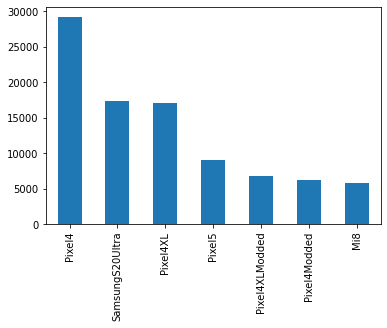

In [34]:
base_test['phoneName'].value_counts().plot(kind='bar')

### phoneごとのレコード数

In [18]:
base_train['phone'].value_counts()

2021-04-22-US-SJC-1_Pixel4             2890
2021-04-22-US-SJC-1_SamsungS20Ultra    2826
2020-09-04-US-SF-2_Mi8                 2500
2021-04-29-US-SJC-2_SamsungS20Ultra    2370
2020-09-04-US-SF-2_Pixel4              2349
                                       ... 
2021-01-05-US-SVL-2_Pixel4XL           1193
2020-06-05-US-MTV-1_Pixel4XLModded     1123
2021-04-26-US-SVL-1_Mi8                1036
2021-04-26-US-SVL-1_Pixel5             1034
2020-05-14-US-MTV-2_Pixel4XLModded      577
Name: phone, Length: 73, dtype: int64

In [19]:
base_test['phone'].value_counts()

2020-05-15-US-MTV-1_Pixel4XL           3517
2020-05-15-US-MTV-1_Pixel4             3488
2020-05-28-US-MTV-1_Pixel4XL           2426
2021-04-02-US-SJC-1_Pixel5             2385
2021-04-02-US-SJC-1_Pixel4             2364
2020-08-13-US-MTV-1_Mi8                2342
2021-03-16-US-MTV-2_SamsungS20Ultra    2326
2021-04-26-US-SVL-2_SamsungS20Ultra    2324
2021-04-22-US-SJC-2_SamsungS20Ultra    2324
2020-05-28-US-MTV-2_Pixel4             2318
2020-05-28-US-MTV-2_Pixel4XL           2309
2020-05-28-US-MTV-1_Pixel4             2256
2020-08-13-US-MTV-1_Pixel4             2245
2021-04-29-US-SJC-3_SamsungS20Ultra    2061
2021-03-16-US-MTV-2_Pixel4Modded       2041
2021-03-16-US-RWC-2_Pixel5             2010
2021-04-29-US-SJC-3_Pixel4             1979
2021-03-16-US-RWC-2_SamsungS20Ultra    1972
2021-03-16-US-RWC-2_Pixel4XL           1968
2020-06-10-US-MTV-2_Pixel4XLModded     1937
2020-06-10-US-MTV-2_Pixel4XL           1805
2020-06-10-US-MTV-2_Pixel4             1794
2021-04-28-US-MTV-2_SamsungS20Ul